# Code Assignment 16 — K-Means Clustering (Mall Customers, 2–3 Features Only)

**Format:** Instructor Guidance → Your Task (step-by-step) → We Share (reflection)

**Goal:** Build a **K-Means** clustering model using **only 2–3 simple numeric features** with **minimal cleaning**, pick **K** via **Elbow + Silhouette** on the **train split**, and sanity-check **generalization** on the **test split**. Then profile clusters in plain business terms.

**Dataset (simple, non-transportation):** *Mall Customers* (public, widely used teaching dataset)  

> We will only use **2–3 numeric columns**: e.g., `Age`, `Annual Income (k$)`, `Spending Score (1-100)`.  



## Instructor Guidance (Pseudocode + Docs)

**Docs:**  
- `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
- `StandardScaler`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
- `KMeans`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  
- `silhouette_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### Pseudocode Plan (Minimal)
1) **Load CSV** → preview columns/shape.  
2) **Pick 2–3 numeric features** (e.g., Age, Income, SpendingScore).  
3) **Drop NA only** on those columns.  
4) **Split**: `train_test_split(X, test_size=0.2, random_state=42)`.  
5) **Scale**: `StandardScaler` — **fit on TRAIN**, transform TRAIN and TEST.  
6) **Choose K** on TRAIN: loop K=2..8 → plot **Elbow (inertia)** and **Silhouette**.  
7) **Fit final KMeans** on TRAIN with your chosen K; predict TRAIN & TEST labels.  
8) **Sanity check**: report **Silhouette (TRAIN vs TEST)**.  
9) **Profile clusters**: per-cluster means of your 2–3 features (no extra cleaning).  
10) **Reflection**: justify K, describe segments, suggest one action per segment.


## Your Task — Step-by-Step
Work in pairs. Keep code minimal. Use only 2–3 features.

### 1) Imports & Settings

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

### 2) Load the Mall Customers CSV & Preview

In [100]:
df = pd.read_csv("/Users/Marcy_Student/Desktop/Marcy_Lab/DA2025_Lectures/Mod6/data/Mall_Customers copy.csv")

In [101]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3) Select **2–3 Numeric Features** (no heavy cleaning)
Choose from:
- `Age`
- `Annual Income (k$)`
- `Spending Score (1-100)`

> Keep it simple: e.g., use **Age + Spending Score** (2D) or **Age + Income + Spending Score** (3D).


In [103]:
X = df[['Age','Spending Score (1-100)']]

### 4) Scale (fit on TRAIN only), then Explore K on TRAIN (Elbow + Silhouette)

In [104]:
# Let's scale the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

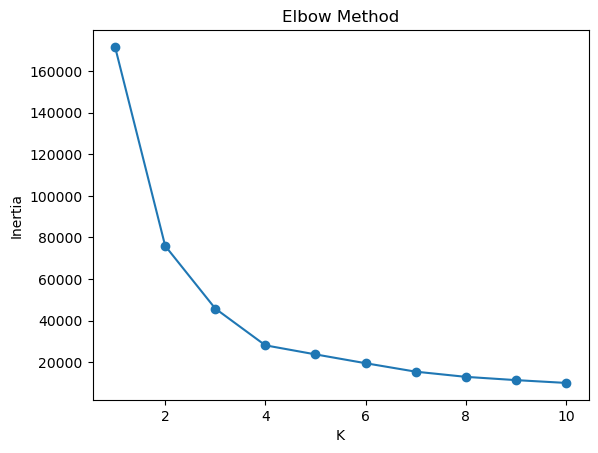

In [105]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


### 6) Choose **K** (justify), Fit Final Model on TRAIN, Check Stability on TEST
- Report **Silhouette TRAIN vs TEST** (higher is better; similar values suggest stability).

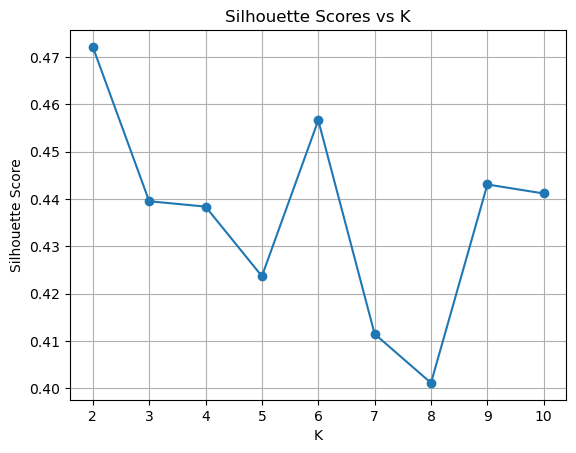

In [106]:
from sklearn.metrics import silhouette_score

sil_scores = []
sil_range = range(2, 11)
for k in sil_range:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    # use the scaled features for clustering and silhouette calculation
    labels_k = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels_k)
    sil_scores.append(sil)

plt.plot(list(sil_range), sil_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores vs K")
plt.xticks(list(sil_range))
plt.grid(True)
plt.show()

In [107]:
# Initialize and fit K-Means (we choose K=4)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X_scaled)


KMeans(n_clusters=2, n_init=10, random_state=0)

In [108]:
print(f'Siliouhette-Score:{sil}')

Siliouhette-Score:0.44116452315733407


In [110]:
#labels = kmeans.fit(X_scaled)
labels = kmeans.fit_predict(X_scaled)


In [111]:
labels 

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [112]:
df['Cluster'] = labels


In [113]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


### 7) Profile Clusters (Business-Readable)
- Use the **original (unscaled)** features for interpretation.
- Show per-cluster means of your **2–3 features**.

In [114]:
profile = df.groupby('Cluster')[['Age','Spending Score (1-100)']].mean()


In [115]:
profile

,Age,Spending Score (1-100)
Cluster,,
0,48.728155,32.184466
1,28.360825,69.329897


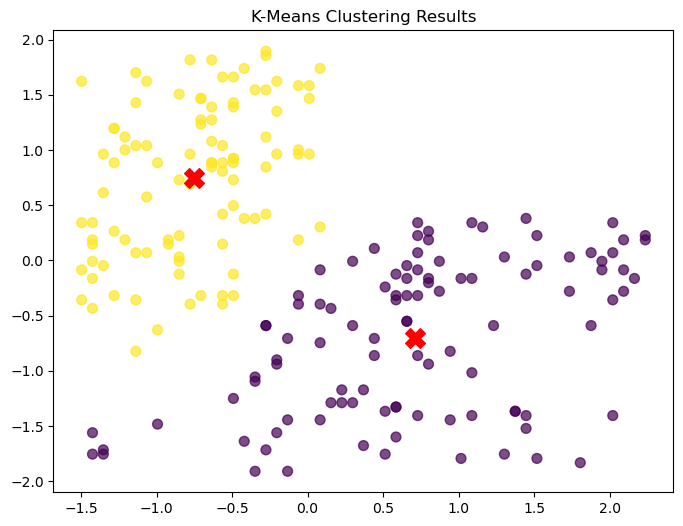

In [91]:
# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
# Plot the centroids (the cluster centers) as red 'X's
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering Results')
plt.show()

## We Share — Reflection (2 short paragraphs)

1) **K choice & stability:** What **K** did you choose and why (Elbow bend, Silhouette peak/plateau, simplicity)? Report **Silhouette (TRAIN vs TEST)** — did structure persist, or did it collapse on test?  
- I choose k=2 using silhouette peak/plateau because it term of score it best predict how well points fit within their cluster, and based on the Silhouette I ploted the highest point correspond to k=2. And after k=3 the structure collapsed. The silhouette score droped sharply meaning that adding more clusters forces the model to split or divide the data uncorrectly. 
2) **Segments & actions:** Give short names to your segments (e.g., “Young High-Spend,” “Mid-Age Value-Seeker,” “Older Low-Spend”) and suggest **one actionable idea** for each (targeted offers, product mix, messaging). 
- Cluster 1= Young High-Spend, give them access to exclusive products or new product lunch to test the performance of a new product because younger spender tend to buy and test many products. Also, try to advertise on sociaux media when their is a new release to show them product will help to make more exposure because young spender spender hours on sociaux media.
- Cluster 0: Mid-Age low spender, spend lower compare to young people, in order to push them to buy more, it is a good idea to do more promotion like buy one get one free. Also make them expose to products that they tend to buy rather than trendy product. 


> Bonus: Re-run with **just 2 features** (e.g., **Income + SpendingScore**) and compare stability & interpretability.
